# Tracking the nuclei

In [1]:
import os
import numpy as np
import pandas as pd
import glob
from tifffile import imread
import tracking
from tqdm import tqdm
import trackpy as tp
import matplotlib.pyplot as plt

Loading file paths

In [3]:
data_path = r"Z:\user\Agathe.Jouneau\3-cell-project\20240426\Data_analysis\cropped_sequences_20240426\3_cells\*-Hoechst.tif"
save_path = r"Z:\user\Agathe.Jouneau\3-cell-project\20240426\Data_analysis\cropped_sequences_20240426\3_cells\tracking_results"

data_path = os.path.abspath(data_path)
save_path = os.path.abspath(save_path)

if not os.path.exists(save_path):
    os.makedirs(save_path)

files = glob.glob(data_path)

Testing to choose the best parameters

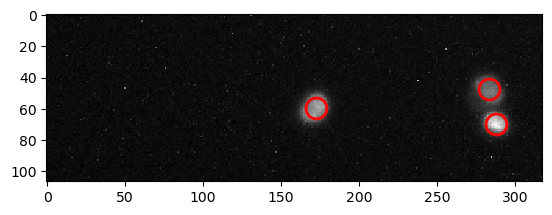

In [4]:
# Change the frame number, the diameter, and the separation value to check that the nuclei are recognized.
# Set topn to the number of cells to detect.

frames = imread(os.path.abspath(files[48]))
frame_no = 1
f = tp.locate(frames[frame_no], diameter=25, minmass=0, topn=3, separation=7)
tp.annotate(f, frames[frame_no])
# plt.hist(f['mass'])
plt.show()


Running trackpy on all files

In [5]:
# Parameters

## Tracking parameters
diameter = 25  #31 is better for 1 cell
separation = 7
topn = 3 # Number of cell
verbose = True

## Saving parameters
start_position = 31
stop_position = 44
overwrite = False
old_suffix = '-Hoechst.tif'
new_suffix = '-tracking.csv'


In [6]:
files = glob.glob(data_path)

for filename in tqdm(files):

    position = int(os.path.basename(filename)[:3])
    if position>=start_position and position<=stop_position:

        frames = imread(os.path.abspath(filename))

        t = tracking.track(frames, diameter=diameter, separation=separation, 
                           topn=topn, verbose=verbose)

        savename = os.path.basename(filename).removesuffix(old_suffix) + new_suffix
        savename = os.path.join(save_path, savename)
        if os.path.exists(savename):
            if overwrite:
                print(f"Warning: the file {savename} already exists and will be deleted.")
                os.remove(savename)
                t.to_csv(savename)
            else:
                print(f"Warning: the file {savename} already exists, the data will not be saved.")
        else:
            t.to_csv(savename)

Frame 85: 3 trajectories present.
Tracking of nuclei completed.


100%|██████████| 80/80 [22:38<00:00, 16.98s/it]
